In [ ]:
!wget https://raw.githubusercontent.com/armandstrickernlp/NLP_Inalco/main/Semester2/Notebooks_sem2/08_LinearGregression_GD/data.csv

# Single Variable (Univariate) Linear Regression

Using the toy dataset loaded below, the goal is to write the linear regression algorithm with Gradient Descent from scratch ! This will help you familiarize yourselves with the essential steps of most machine learning algorithms.

## The Data
This is a toy dataset of 100 examples, where the lot area is in m2 and the sale price is in thousands.  The sale prices have been divided by a factor of thousand to have features and labels on a similar scale.

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing Input data
data = pd.read_csv('data.csv', names=['LotArea', 'SalePrice'])
data.head()

,LotArea,SalePrice
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


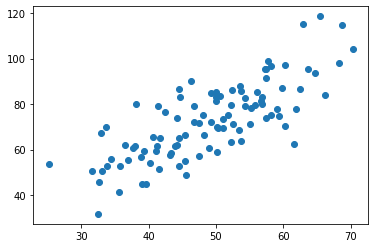

In [4]:
X = data.iloc[:, 0] 
labels = data.iloc[:, 1]
plt.scatter(X, labels)
plt.show()

## The model

For single variable linear regression, our model is defined by the function:  
$$h(x) = \theta_0 + \theta_1x$$

Write a function which returns an array of predictions, using as input :
* an array of examples with a single feature
* the parameters of the model.

In [1]:
def predict(X, theta0, theta1):
    
    # transcribe the formula above, easy enough :
    preds = theta0 + theta1 * X
    
    return preds

In [5]:
# you should have an array of predictions
predict(X, theta0=1, theta1=1)

0     33.502345
1     54.426804
2     62.530358
3     48.475640
4     60.813208
        ...    
95    51.030174
96    50.239765
97    51.039576
98    49.149859
99    26.128485
Name: LotArea, Length: 100, dtype: float64

**Expected output for the first example is 54.43**

## The Cost function

The cost function allows you to evaluate how good your model fits the data.  In this case, we are going to use the MSE (Mean Squared Error) loss, defined as :
$$ J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^m (h(x^i) - y^i)^2 $$ 

where *m* is the number of examples, so 100 in our case.

This gives us the average error over our model's predictions.  Write a function which outputs this cost.

In [7]:
def cost(preds, labels):
    """
    Preds and labels are numpy arrays, so no need to use "for" loops !
    Try doing some of the operations on paper with numpy arrays of only 2-3 examples to make things easier.
    """
    # length of the dataset
    m = len(X)
    
    # write out the formula above without using a for loop to go through each elment of the predictions array.
    
    # predictions - labels => the array of differences
    differences = preds - labels
    
    # Square the differences
    diff_squared = np.square(differences)
    
    # Sum the squared differences and divide by 2m :
    loss = np.sum(diff_squared)/(2*m)
    
    return loss

In [8]:
# test your function
cost(labels+1, labels)

0.5

**Expected output is 0.5**

## Gradient Descent

Gradient Descent performs updates on the weights of the model, in order to minimize the cost/loss (these can be used interchangeably).  
Here is the formula for the update of each parameter in the model :
$$ \theta_0 = \theta_0 - \alpha  \frac{1}{m} \sum_{i=1}^{m}(h(x^i) - y^i) $$
$$ \theta_1 = \theta_1 - \alpha  \frac{1}{m} \sum_{i=1}^{m}(h(x^i) - y^i)x^i$$ 

Where *alpha* is the `learning_rate` (the size of the update steps we want to take) and the term on the right is the formula for the partial derivative of the cost function, with respect to each parameter.
Write a function which performs these updates.

In [9]:
def gradient_descent(learning_rate, X, preds, labels, theta0, theta1):
    
    # write out the part of the formula which comes right after alpha, the partial derivatives :
    
    # difference preds/labels
    difference = preds - labels

    
    # for theta 1, each difference int he array of differences needs to be multiplied by its example x :
    difference_X = difference * X
    
    # all that's left is applying the mean (sum/m) to get the partial derivatives of each parameter :
    partial_theta0 = np.mean(difference)
    
    partial_theta1 = np.mean(difference_X)
    
    
    # update the parameters!
    theta0 -= learning_rate * partial_theta0
    theta1 -= learning_rate * partial_theta1
    
    return theta0, theta1

## Main Loop

We can now go through the data and fit our model :

epoch 0


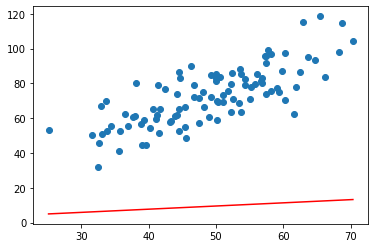

Loss = 2126.040870121021
epoch 1


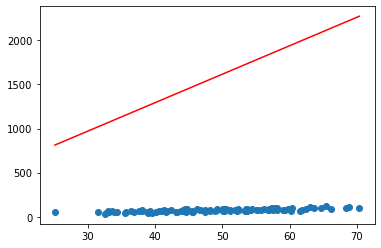

Loss = 1184267.5297111287
epoch 2


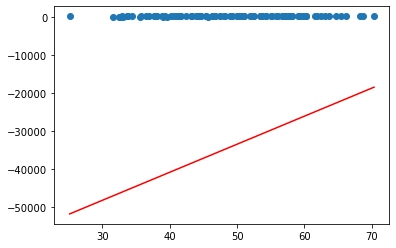

Loss = 677522617.0376182
epoch 3


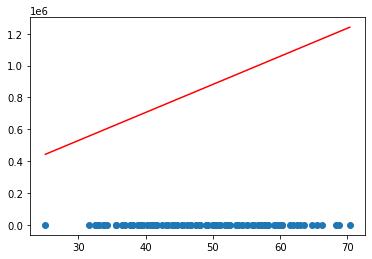

Loss = 387630833213.23663
epoch 4


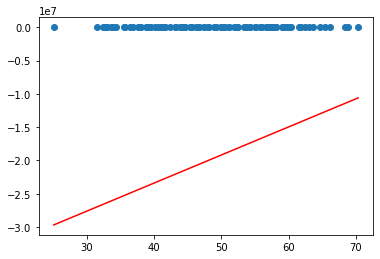

Loss = 221775143000934.56
epoch 5


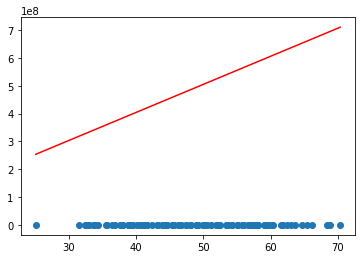

Loss = 1.2688416360608667e+17
epoch 6


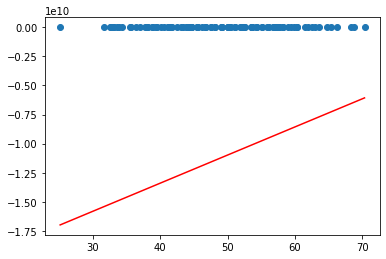

Loss = 7.259420851304512e+19
epoch 7


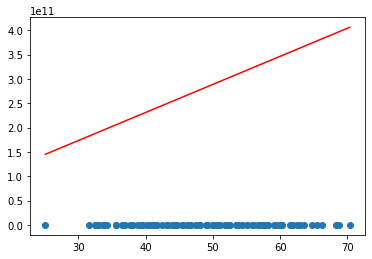

Loss = 4.153330849069548e+22
epoch 8


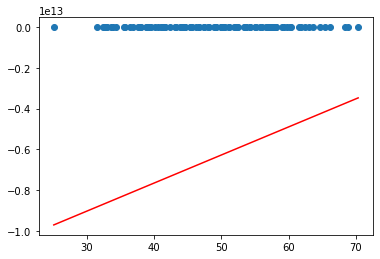

Loss = 2.3762442617902423e+25
epoch 9


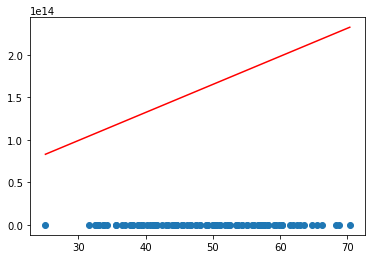

Loss = 1.3595201049191684e+28
theta0=-1552637923179.028, theta1=-78995776762770.61


In [13]:
import random

# Choose the "hyperparameters" you want :
# The learning rate, typically very low, between 1e-2 and 1e-6 depending on the task.  
# 1e-4 is recommended to begin with in this case
LR = 1e-2  
# The number of passes over the dataset, ie. the number of times we update the weights.  These are alled "epochs".
EPOCHS = 10  

m = len(X) # Number of elements in X


# Initilize the cost/loss to a very high value
prev_loss = 1e9
# Initialize the parameters, setting them to random values between 0 and 1:
theta0, theta1 = random.random(), random.random()


# Loop
for i in range(EPOCHS): 
       
    # compute the model's predictions
    Y_pred = predict(X, theta0, theta1)
    
    # plot the model to have a visual intuition of the model's progress
    print(f'epoch {i}')
    plt.scatter(X, labels)
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
    plt.show()
    
    
    # compute the loss
    loss = cost(Y_pred, labels)
    print(f'Loss = {loss}')
    
    # To see if the model is improving, compare this loss to the previous loss.
    # if the difference is smaller than 1e-2, then we can consider the model has found the global minimum 
    # and there is no need to continue updating the weights.
    
    #if prev_loss - loss < 1e-2 :
        #print(f'{loss=}')
        #break
        
    # if the difference is significant, update the previous loss
    prev_loss = loss
                     
    
    # and update the parameters  
    theta0, theta1 = gradient_descent(LR, X, Y_pred, labels, theta0, theta1) 

print(f'{theta0=}, {theta1=}')

**Expected values** for theta0 and theta1 should be 
* theta0 => between 0 and 1
* theta1 => close to 1.47

Play around with the learning rates !! Set 10 epochs and comment out the condition with the break statement beforehand and then try:
* 5e-4 : how many epochs til the loss stops changing ?
* 1e-2 : what's going on with the model ?

# Multivariate Linear Regression

You make look through this, but we will go through it together

In [ ]:
# Create a toy dataset

X = np.random.randn(5, 500) # 5 features, 500 examples
y = 3 * X[0, :] + np.random.randn(1, 500) * 0.1 # to vreate the labels, take the first row of X and add noise => *3, add random numbers*0.1


X1 = np.ones((1, X.shape[1]))
X = np.append(X, X1, axis=0) # add "dummy" features as a row of ones
#print(X)

In [ ]:
# m => number of examples
# n => number of features
m = X.shape[1]
n = X.shape[0]

# initialize parameter/weight vector
theta = np.random.randn(n, 1)

In [ ]:
lr = 1e-2
epochs = 5000

for epoch in range(epochs+1):
    preds = np.dot(theta.reshape(1,-1), X)
    loss = np.mean((preds - y)**2) / 2
    #print(f'Loss : {loss}')
    if epoch % 2000 == 0: 
        print(f'Loss is {loss} at epoch {epoch}')
    
    dL_dtheta = 1/m * np.dot(X, (preds-y).T)
    theta -= lr * dL_dtheta
 